In [1]:
# 지수 만들기
# 0. 맵핑 정보 가져오기
# 1. 대상 코드 입력
# 2. 지수 생성 (동일가중)

import pandas as pd
import requests
import re
import FinanceDataReader as fdr
import datetime 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
start_date = '20201114'
end_date = '20211114'
df_krx = fdr.StockListing('KRX')

In [4]:
# 0. 맵핑 정보 가져오기 
def get_thema_code(num) : 
    thema_url = 'https://m.infostock.co.kr/sector/sector_detail.asp?code=' + str(num) + ''
    thema_page = requests.get(thema_url)
    code_list = []
    if thema_page.status_code == 200 :
        thema_tables = pd.read_html(thema_page.text)
        for i in range(4,len(thema_tables[0][0])) : 
            code_list.append(re.sub(r'[^0-9]','',thema_tables[0][0][i]))
    else : 
        pass 
    return code_list 

In [5]:
# 1. 대상 코드 입력 
thema_info = {496: '골프',
              492: 'NFT',
              504: '요소수 관련주',
              44 : '시멘트/레미콘',
              488 : '웹툰'}

In [7]:
# 2. 지수 생성 
def get_thema_idx(df_krx, thema_info) : 
    idx = pd.DataFrame()
    for key,value in thema_info.items():
        code_list = get_thema_code(key)
        df = pd.DataFrame()
        for i in range(0, len(code_list)) :
            df_temp = pd.DataFrame(fdr.DataReader(code_list[i], start_date, end_date)['Close'])
            code_info = df_krx[df_krx['Symbol'].isin(code_list)]
            df_temp.columns = code_info[code_info['Symbol']==code_list[i]].Name
            df = pd.concat([df,df_temp], axis= 1)
        df = df.pct_change().fillna(0)
        idx_temp = pd.DataFrame(df.sum(axis=1)/len(df.columns), index = df.index, columns= [value])
        idx = pd.concat([idx,idx_temp], axis =1)
        cum_idx = (1 + idx).cumprod() - 1
    return cum_idx

In [9]:
get_thema_idx(df_krx, thema_info) 

,골프,NFT,요소수 관련주,시멘트/레미콘,웹툰
Date,,,,,
2020-11-16,0.000000,0.000000,0.000000,0.000000,0.000000
2020-11-17,-0.000654,-0.015159,-0.031213,0.001003,-0.014879
2020-11-18,-0.002903,0.000621,-0.016458,0.010264,0.000338
2020-11-19,-0.005696,0.009605,-0.000094,0.010754,-0.003241
2020-11-20,-0.004502,0.036839,0.014086,0.007682,0.003464
...,...,...,...,...,...
2021-11-08,0.327297,1.214742,0.396734,0.456402,0.442601
2021-11-09,0.312791,1.374225,0.378759,0.441574,0.475256
2021-11-10,0.287126,1.351147,0.273558,0.415485,0.460558


In [10]:
idx = get_thema_idx(df_krx, thema_info) 

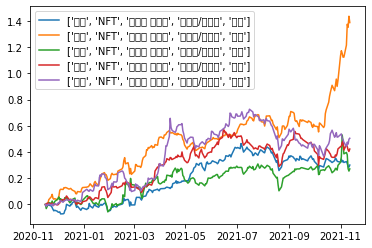

In [13]:
import warnings
warnings.filterwarnings(action='ignore')


plt.plot(idx,label = [i for i in idx.columns]) 
plt.legend() 